<a href="https://colab.research.google.com/github/Selinduman/Hypatia/blob/main/bitirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
!pip install python-binance

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 12.6 MB/s 
     |████████████████████████████████| 103 kB 8.7 MB/s 
     |████████████████████████████████| 288 kB 24.1 MB/s 
     |████████████████████████████████| 144 kB 38.7 MB/s 
     |████████████████████████████████| 94 kB 1.9 MB/s 
     |████████████████████████████████| 271 kB 45.5 MB/s 


In [3]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 4.4 MB/s 
     |████████████████████████████████| 2.8 MB 15.7 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [4]:
df=pd.read_csv("APPLE.csv")
df1=pd.read_csv("AMAZON.csv")
df2=pd.read_csv("NETFLİX.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-15,121.410004,124.000000,120.419998,123.989998,123.257416,92403800
1,2021-03-16,125.699997,127.220001,124.720001,125.570000,124.828087,115227900
2,2021-03-17,124.050003,125.860001,122.339996,124.760002,124.022865,111932600
3,2021-03-18,122.879997,123.180000,120.320000,120.529999,119.817863,121229700
4,2021-03-19,119.900002,121.430000,119.680000,119.989998,119.281052,185549500


In [6]:
df=df[["Date","Adj Close"]]
df1=df1[["Date","Adj Close"]]
df2=df2[["Date","Adj Close"]]

In [7]:
df2.head()

,Date,Adj Close
0,2021-03-15,520.250000
1,2021-03-16,524.030029
2,2021-03-17,524.440002
3,2021-03-18,504.790009
4,2021-03-19,512.179993


In [8]:
df2.tail()

,Date,Adj Close
248,2022-03-08,341.760010
249,2022-03-09,358.790009
250,2022-03-10,356.769989
251,2022-03-11,340.320007
252,2022-03-14,331.010010


In [9]:
stocks=pd.concat([df["Adj Close"],df1["Adj Close"],df2["Adj Close"]],axis=1)
stocks.columns=["Apple","Amazon","Netflix"]
stocks

,Apple,Amazon,Netflix
0,123.257416,3081.679932,520.250000
1,124.828087,3091.860107,524.030029
2,124.022865,3135.729980,524.440002
3,119.817863,3027.989990,504.790009
4,119.281052,3074.959961,512.179993
...,...,...,...
248,157.440002,2720.290039,341.760010
249,162.949997,2785.580078,358.790009
250,158.520004,2936.350098,356.769989
251,154.729996,2910.489990,340.320007


In [10]:
returns = stocks.pct_change()
returns


,Apple,Amazon,Netflix
0,NaN,NaN,NaN
1,0.012743,0.003303,0.007266
2,-0.006451,0.014189,0.000782
3,-0.033905,-0.034359,-0.037469
4,-0.004480,0.015512,0.014640
...,...,...,...
248,-0.011676,-0.010465,-0.024268
249,0.034997,0.024001,0.049830
250,-0.027186,0.054125,-0.005630
251,-0.023909,-0.008807,-0.046108


In [11]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,Apple,Amazon,Netflix
Apple,0.058419,0.038596,0.035470
Amazon,0.038596,0.095306,0.056567
Netflix,0.035470,0.056567,0.158016


In [12]:
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

In [13]:
mu= expected_returns.mean_historical_return(stocks, frequency=252)

In [14]:
mu

Apple      0.221995
Amazon    -0.079379
Netflix   -0.363748
dtype: float64

In [15]:
S=risk_models.sample_cov(stocks,frequency=252)

In [16]:
S

,Apple,Amazon,Netflix
Apple,0.058419,0.038596,0.035470
Amazon,0.038596,0.095306,0.056567
Netflix,0.035470,0.056567,0.158016


In [17]:
ef= EfficientFrontier(mu,S)

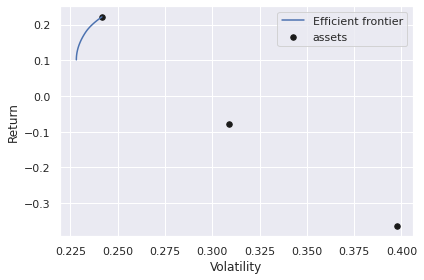

In [18]:
plotting.plot_efficient_frontier(ef,show_assets=True)


In [19]:
ef.tickers

['Apple', 'Amazon', 'Netflix']

In [20]:
ef.expected_returns

array([ 0.2219954 , -0.07937874, -0.36374818])

In [21]:
np.diag(ef.cov_matrix) **(1/2)

array([0.24169984, 0.30871604, 0.39751263])

In [22]:
import matplotlib as plt

In [23]:
import matplotlib.pyplot as plt

In [24]:
 import matplotlib as subplots

In [25]:
ef= EfficientFrontier(mu,S)

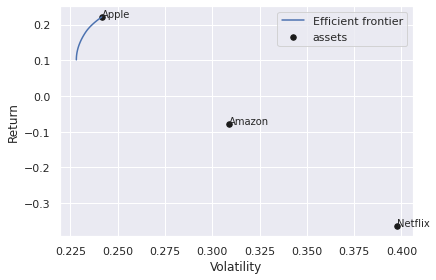

In [26]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef,ax=ax, show_assets=True)
for i, txt in enumerate(ef.tickers): 
 ax.annotate(txt, ((np.diag(ef.cov_matrix) ** (1/2))[i],ef.expected_returns[i]))

In [27]:
df.rename(columns={"Adj Close":"Price of week_t"},inplace=True)
df1.rename(columns={"Adj Close":"Price of week_t"},inplace=True)
df2.rename(columns={"Adj Close":"Price of week_t"},inplace=True)

In [28]:
df.head()

,Date,Price of week_t
0,2021-03-15,123.257416
1,2021-03-16,124.828087
2,2021-03-17,124.022865
3,2021-03-18,119.817863
4,2021-03-19,119.281052


In [29]:
df["Price of week_t-1"]=df["Price of week_t"].shift(1)
df1["Price of week_t-1"]=df1["Price of week_t"].shift(1)
df2["Price of week_t-1"]=df2["Price of week_t"].shift(1)

In [30]:
df.head()

,Date,Price of week_t,Price of week_t-1
0,2021-03-15,123.257416,NaN
1,2021-03-16,124.828087,123.257416
2,2021-03-17,124.022865,124.828087
3,2021-03-18,119.817863,124.022865
4,2021-03-19,119.281052,119.817863


In [31]:
df["Return"]=(df["Price of week_t"]/df["Price of week_t-1"])-1
df1["Return"]=(df1["Price of week_t"]/df1["Price of week_t-1"])-1
df2["Return"]=(df2["Price of week_t"]/df2["Price of week_t-1"])-1

In [32]:
df.head()

,Date,Price of week_t,Price of week_t-1,Return
0,2021-03-15,123.257416,NaN,NaN
1,2021-03-16,124.828087,123.257416,0.012743
2,2021-03-17,124.022865,124.828087,-0.006451
3,2021-03-18,119.817863,124.022865,-0.033905
4,2021-03-19,119.281052,119.817863,-0.004480


In [33]:
stocksData = stocks

In [34]:
import matplotlib
import matplotlib.pyplot as plt

NameError: ignored

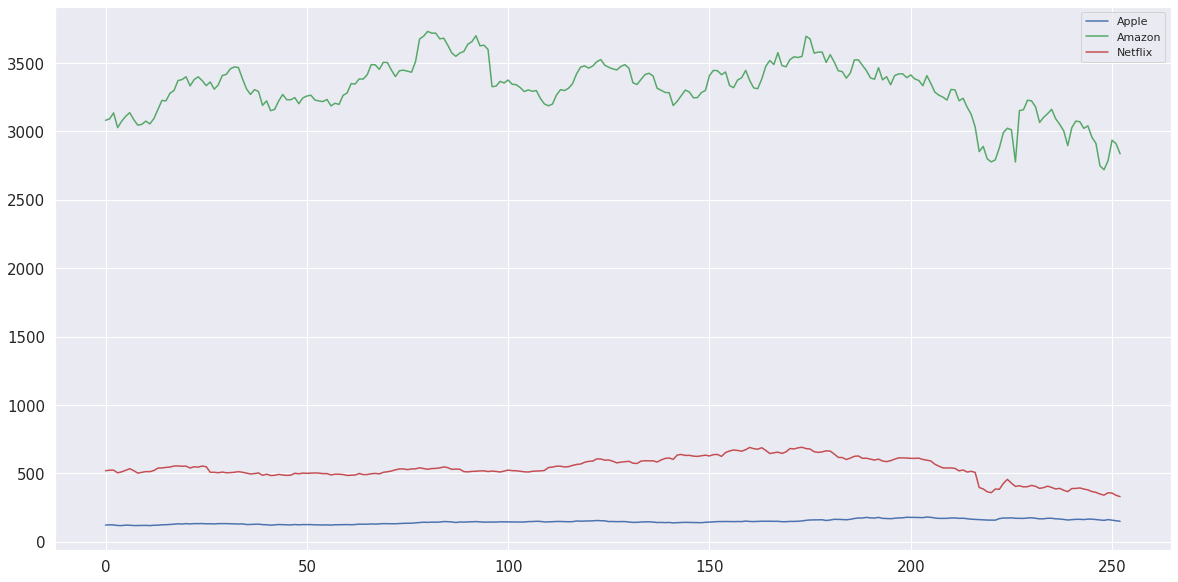

In [35]:
import matplotlib.pyplot as plt
stocksData.plot(figsize= (20,10), fontsize=15)
pyplot.show()

In [36]:
data = stocksData.pct_change().dropna()

In [37]:
data = data.describe()

In [38]:
data

,Apple,Amazon,Netflix
count,252.000000,252.000000,252.000000
mean,0.000911,-0.000141,-0.001466
std,0.015226,0.019447,0.025041
min,-0.039264,-0.078128,-0.217905
25%,-0.008422,-0.010818,-0.010618
50%,0.000557,-0.000093,0.000853
75%,0.011577,0.010444,0.010216
max,0.069778,0.135359,0.111302


InstantiationError: ignored

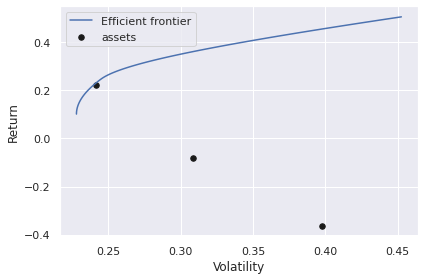

In [39]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(stocks)
S = risk_models.sample_cov(stocks)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2] == 1)
plotting.plot_efficient_frontier(ef)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)